In [1]:
#!pip install yfinance

In [2]:
%reload_ext nb_black


<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot


%matplotlib inline
plt.style.use("fivethirtyeight")

<IPython.core.display.Javascript object>

In [4]:
def get_95_ci(x1, x2):
    """Calculate a 95% CI for 2 1d numpy arrays"""
    signal = x1.mean() - x2.mean()
    noise = np.sqrt(x1.var() / x1.size + x2.var() / x2.size)

    ci_lo = signal - 1.96 * noise
    ci_hi = signal + 1.96 * noise

    return ci_lo, ci_hi


%matplotlib inline

<IPython.core.display.Javascript object>

In [5]:
stocks = pd.read_csv(r"C:\Users\GaukharJavarova\Downloads\aggdata.csv")
stocks.head()

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,netinccmn,fcfps,PX_TO_BOOK_RATIO,RETURN_ON_ASSET,OPER_MARGIN,CASH_FLOW_PER_SHARE,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET
0,ZYME,8269000.0,3.091,9007000.0,636578000.0,-3.765,-37487000.0,48686718.0,0.170,-35880000.0,...,-162932000.0,-2.154,3.091,-0.358217,-4.339098,-0.823549,0.181661,-16.467038,6.807722,0.014149
1,ZYME,1877000.0,7.288,6881000.0,368205000.0,-38.489,-36354000.0,43658717.0,0.043,-73752000.0,...,-145437000.0,-2.319,7.288,-0.409374,-39.292488,-0.922987,0.047655,-19.603277,3.647265,0.018688
2,ZYME,7860000.0,3.146,6755000.0,400037000.0,-3.877,-10880000.0,43445379.0,0.181,-33564000.0,...,-63920000.0,0.004,3.146,-0.197080,-4.270229,-0.277127,0.200204,6200.000000,6.678431,0.016886
3,ZYME,7882000.0,2.112,7829000.0,414547000.0,-3.689,-13317000.0,32837975.0,0.240,-29432000.0,...,-52196000.0,0.028,2.112,-0.191239,-3.734078,-0.415356,0.245839,785.714286,8.874183,0.018886
4,ZYME,11925000.0,3.048,8065000.0,238279000.0,-1.144,-21302000.0,32020437.0,0.372,-14553000.0,...,-28993000.0,0.616,3.048,-0.130571,-1.220377,-0.665162,0.372362,26.266234,6.440652,0.033847


<IPython.core.display.Javascript object>

In [6]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40277 entries, 0 to 40276
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker                   40277 non-null  object 
 1   revenue                  39949 non-null  float64
 2   pb                       38433 non-null  float64
 3   debt                     39416 non-null  float64
 4   assets                   39416 non-null  float64
 5   netmargin                38980 non-null  float64
 6   ncfo                     39683 non-null  float64
 7   shareswa                 40072 non-null  float64
 8   sps                      39800 non-null  float64
 9   opinc                    39949 non-null  float64
 10  assetsc                  30302 non-null  float64
 11  liabilitiesc             30265 non-null  float64
 12  price                    38513 non-null  float64
 13  calendardate             40277 non-null  object 
 14  datekey               

<IPython.core.display.Javascript object>

In [7]:
stocks.shape

(40277, 31)

<IPython.core.display.Javascript object>

In [8]:
stocks.dtypes

ticker                      object
revenue                    float64
pb                         float64
debt                       float64
assets                     float64
netmargin                  float64
ncfo                       float64
shareswa                   float64
sps                        float64
opinc                      float64
assetsc                    float64
liabilitiesc               float64
price                      float64
calendardate                object
datekey                     object
sharesbas                  float64
equity                     float64
receivables                float64
investmentsc               float64
cashneq                    float64
assetsavg                  float64
netinccmn                  float64
fcfps                      float64
PX_TO_BOOK_RATIO           float64
RETURN_ON_ASSET            float64
OPER_MARGIN                float64
CASH_FLOW_PER_SHARE        float64
REVENUE_PER_SHARE          float64
PX_FREE_CASH_FLOW   

<IPython.core.display.Javascript object>

In [9]:
stocks["cashneq"].describe()

count    3.941600e+04
mean     5.317810e+09
std      1.080713e+11
min      0.000000e+00
25%      7.426350e+07
50%      2.117000e+08
75%      6.499245e+08
max      5.314380e+12
Name: cashneq, dtype: float64

<IPython.core.display.Javascript object>

data is continuous

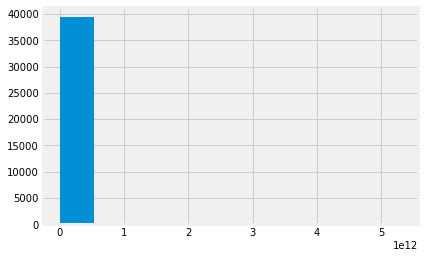

DescribeResult(nobs=40277, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)

<IPython.core.display.Javascript object>

In [10]:
stocks["cashneq"].hist()
plt.show()
stats.describe(stocks["cashneq"])

In [11]:
stocks[
    "cashneq"
] >= 1000000000  # how to get here stock names and only those which has > 5B?

0        False
1        False
2        False
3        False
4        False
         ...  
40272     True
40273     True
40274     True
40275     True
40276     True
Name: cashneq, Length: 40277, dtype: bool

<IPython.core.display.Javascript object>

In [12]:
# enough_cash = ['cashneq'] > 5000000000

<IPython.core.display.Javascript object>

In [13]:
stocks["enough_cash"] = np.where(stocks["cashneq"] > 1000000000, 1, 0)

<IPython.core.display.Javascript object>

In [14]:
stocks.enough_cash

0        0
1        0
2        0
3        0
4        0
        ..
40272    1
40273    1
40274    1
40275    1
40276    1
Name: enough_cash, Length: 40277, dtype: int32

<IPython.core.display.Javascript object>

In [15]:
stocks[["ticker", "enough_cash", "cashneq"]].head()

,ticker,enough_cash,cashneq
0,ZYME,0,189485000.0
1,ZYME,0,128451000.0
2,ZYME,0,250844000.0
3,ZYME,0,283520000.0
4,ZYME,0,43174000.0


<IPython.core.display.Javascript object>

In [16]:
df2019 = stocks[stocks["calendardate"] == "2019-03-31"]
# import datetime datetime.datetime.strptime('2020-07-07', '%Y-%m-%d')

<IPython.core.display.Javascript object>

In [17]:
df2019[["ticker", "calendardate", "enough_cash", "cashneq"]].head()

,ticker,calendardate,enough_cash,cashneq
4,ZYME,2019-03-31,0,4.317400e+07
19,ZUO,2019-03-31,0,6.260800e+07
33,ZTS,2019-03-31,1,1.728000e+09
54,ZS,2019-03-31,0,5.497400e+07
68,ZNGA,2019-03-31,0,2.647490e+08


<IPython.core.display.Javascript object>

In [18]:
df2019.shape

(2022, 32)

<IPython.core.display.Javascript object>

In [19]:
df2019 = stocks[stocks["calendardate"] == "2019-03-31"]

df2020 = stocks[stocks["calendardate"] == "2020-03-31"]
df2020 = df2020.rename(
    columns={"price": "price2020", "calendardate": "calendardate2020"}
)

<IPython.core.display.Javascript object>

In [20]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 40256
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker                   1990 non-null   object 
 1   revenue                  1990 non-null   float64
 2   pb                       1989 non-null   float64
 3   debt                     1990 non-null   float64
 4   assets                   1990 non-null   float64
 5   netmargin                1942 non-null   float64
 6   ncfo                     1980 non-null   float64
 7   shareswa                 1990 non-null   float64
 8   sps                      1990 non-null   float64
 9   opinc                    1990 non-null   float64
 10  assetsc                  1545 non-null   float64
 11  liabilitiesc             1543 non-null   float64
 12  price2020                1989 non-null   float64
 13  calendardate2020         1990 non-null   object 
 14  datekey                

<IPython.core.display.Javascript object>

In [22]:
df2019 = pd.merge(
    df2019,
    df2020[["ticker", "price2020", "calendardate2020"]],
    how="inner",
    on="ticker",
)
df2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1989
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker                   1990 non-null   object 
 1   revenue                  1990 non-null   float64
 2   pb                       1915 non-null   float64
 3   debt                     1955 non-null   float64
 4   assets                   1955 non-null   float64
 5   netmargin                1932 non-null   float64
 6   ncfo                     1982 non-null   float64
 7   shareswa                 1988 non-null   float64
 8   sps                      1988 non-null   float64
 9   opinc                    1990 non-null   float64
 10  assetsc                  1512 non-null   float64
 11  liabilitiesc             1511 non-null   float64
 12  price                    1918 non-null   float64
 13  calendardate             1990 non-null   object 
 14  datekey                 

<IPython.core.display.Javascript object>

In [ ]:
#stocks["calendardate"] = pd.to_datetime(stocks["calendardate"])


In [35]:
df2019["return"] = (df2019["price2020"] - df2019["price"]) / df2019["price"] 

<IPython.core.display.Javascript object>

In [ ]:
import datetime
datetime.datetime.strptime('2020-07-07', '%Y-%m-%d') 


In [ ]:
diff_df = pd.merge(df2019, df2020, how='inner', indicator='Exist')

diff_df = diff_df.loc[diff_df['Exist'] != 'both']

In [ ]:
stocks.info()

In [ ]:
stocks[["ticker", "enough_cash", "cashneq", "calendardate"]].head()

In [ ]:
df2020